In [59]:
# Importing modules
import glob
import os
from pathlib import Path
import pandas as pd
import geopandas as gpd
import zipfile
from pyproj import CRS
import matplotlib.pyplot as plt

In [30]:
# Defining FileFinder
def FileFinder(YKR_IDs: list, input_folder_name: str, to_file=False):
    """
    Returns a list of time matrix files based on a list of YKR ID values
    from a specified input data folder. 

            Parameters:
                    YKR_IDs (list): A list of YKR_ID numbers
                    input_folder_name (str): Name of the input folder
                    to_file (boolean): If True, also returns a text file

            Returns:
                    file_paths (list): A list of filepaths
    """
    # Using assert to make sure input is ok
    assert type(YKR_IDs) == list, "The input of the YKR_ID:s needs to be a list!"
    # Finding the folder from the user's instance
    input_folder = Path(input_folder_name).absolute()
    # Using assert to make sure input folder exists
    assert os.path.isdir(input_folder) == True, "Check the input folder's name!"
    # Defining counter
    counter = 1
    # Creating an empty list for the filepaths
    file_paths = []
    # Creating a variable for the f-string
    glob_end = "*.txt"
    # Creating a variable for glob
    glob_start = f"{input_folder_name}/**/travel_times_to_ "
    # Creating a list to check for false YKR ID's
    false_names = YKR_IDs.copy()
    # For-looping the user's folders (and subfolders) with glob
    for name in glob.glob(glob_start+glob_end, recursive=True):
        # Finding the YKR ID part of the filepath
        end_txt = name[-11:]
        end = end_txt[:-4]
        # Checking if the YKR ID of the filepath exists in input list
        if end in YKR_IDs:
            # Informing user of current progress
            print(f"Processing file {name}. Progress: {counter}/{len(glob.glob(glob_start+glob_end, recursive=True))}")
            # Appending filepath to list
            file_paths.append(name)
            # Increasing counter
            counter += 1
            # Removing real YKR ID's from the false YKR ID list
            false_names.remove(end)
        else:
            continue
    # Informing user of false YKR ID's
    for false_ID in false_names:
        print(f"YKR ID number {false_ID} does not exist in folder: {input_folder_name}\nMake sure the YKR ID values in the input list are typed correctly.")
    # Checking for the optional parameter (default is False)
    if to_file == True:
        # Writing the list of filepaths to a text file
        with open("YKR_ID_fps", "w") as output:
            output.write(str(file_paths))
        # Informing the user of the name of the new text file
        print("Wrote the filepaths to file: YKR_ID_fps.txt")
    # Returning the list of filepaths
    return file_paths

In [39]:
# Testing the FileFinder
#FileFinder(lista, "input_data")
#print(FileFinder(lista, "input_data"))

In [38]:
data = pd.read_csv(FileFinder(lista, "input_data")[8], sep=";")
data

Processing file input_data\travel_times_to_ 5787544.txt. Progress: 1/10
Processing file input_data\travel_times_to_ 5787545.txt. Progress: 2/10
Processing file input_data\travel_times_to_ 5787546.txt. Progress: 3/10
Processing file input_data\travel_times_to_ 5787547.txt. Progress: 4/10
Processing file input_data\travel_times_to_ 5787548.txt. Progress: 5/10
Processing file input_data\travel_times_to_ 5787549.txt. Progress: 6/10
Processing file input_data\travel_times_to_ 5787550.txt. Progress: 7/10
Processing file input_data\sub_folder\travel_times_to_ 5990000.txt. Progress: 8/10
Processing file input_data\sub_folder\travel_times_to_ 5990001.txt. Progress: 9/10
Processing file input_data\sub_folder\travel_times_to_ 5990002.txt. Progress: 10/10
YKR ID number 1234567 does not exist in folder: input_data
Make sure the YKR ID values in the input list are typed correctly.


,from_id,to_id,walk_t,walk_d,bike_s_t,bike_f_t,bike_d,pt_r_tt,pt_r_t,pt_r_d,pt_m_tt,pt_m_t,pt_m_d,car_r_t,car_r_d,car_m_t,car_m_d,car_sl_t
0,5785640,5990001,583,40784,178,113,39558,191,171,45848,208,178,45848,82,46868,71,46969,42
1,5785641,5990001,545,38168,175,111,36953,201,174,46054,214,176,46054,82,47079,71,47180,42
2,5785642,5990001,546,38247,175,111,36953,205,175,46171,214,177,46171,82,46480,71,44805,42
3,5785643,5990001,551,38540,171,108,38261,215,179,46464,214,181,46464,82,48363,71,48675,43
4,5787544,5990001,576,40294,175,111,39018,189,164,45358,198,171,45358,81,46442,70,46543,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13226,6016698,5990001,511,35755,166,105,35792,147,124,38723,140,123,38723,83,39030,72,39001,43
13227,6016699,5990001,513,35882,165,105,35769,147,126,38850,142,125,38850,83,38717,72,38689,43
13228,6018252,5990001,518,36253,169,107,36308,153,131,39221,147,130,39221,85,-1,73,-1,44
13229,6018253,5990001,516,36112,168,106,36070,149,129,39080,142,128,39080,84,39207,72,39178,44


In [31]:
# A test list for the FileFinder
lista = ["5787544", "5787545", "5787546", "5787547", "5787548", "5787549", "5787550", "1234567", "5990000", "5990001", "5990002"]

In [66]:
def TableJoiner(filepaths: list, grid_fp: str, output_folder: str):
    
    grid = gpd.read_file(grid_fp)
    print("grid CRS:" ,grid.crs)
    
    for fp in filepaths:
        
        data = pd.read_csv(fp, sep=";")
        
        merge = grid.merge(data, how="right", left_on="YKR_ID", right_on="from_id")
        
        #merge.plot()
        
        # Create one subplot, control figure size here
        fig, ax = plt.subplots(figsize=(12, 8))

        # Visualize travel times
        merge.plot(ax=ax, column="car_r_t",  scheme="quantiles", cmap="Spectral", k=9, alpha=0.9)
        
        # Save figure
        #outfp = f"{fp}_map.png"
        #plt.savefig(outfp, dpi=300)
        
        
        break
        
        

Processing file input_data\travel_times_to_ 5787544.txt. Progress: 1/10
Processing file input_data\travel_times_to_ 5787545.txt. Progress: 2/10
Processing file input_data\travel_times_to_ 5787546.txt. Progress: 3/10
Processing file input_data\travel_times_to_ 5787547.txt. Progress: 4/10
Processing file input_data\travel_times_to_ 5787548.txt. Progress: 5/10
Processing file input_data\travel_times_to_ 5787549.txt. Progress: 6/10
Processing file input_data\travel_times_to_ 5787550.txt. Progress: 7/10
Processing file input_data\sub_folder\travel_times_to_ 5990000.txt. Progress: 8/10
Processing file input_data\sub_folder\travel_times_to_ 5990001.txt. Progress: 9/10
Processing file input_data\sub_folder\travel_times_to_ 5990002.txt. Progress: 10/10
YKR ID number 1234567 does not exist in folder: input_data
Make sure the YKR ID values in the input list are typed correctly.
grid CRS: epsg:3067


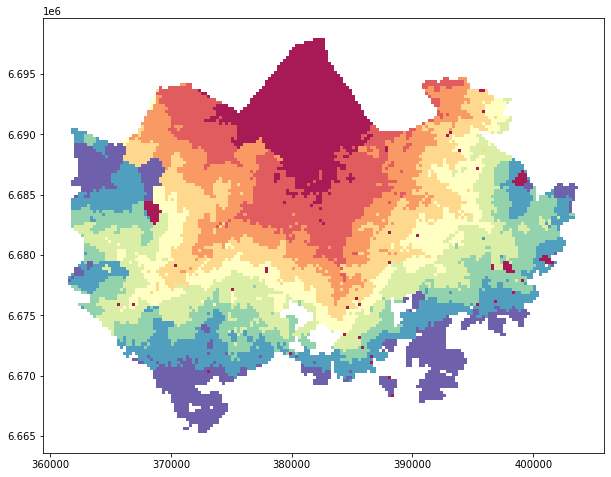

In [67]:
TableJoiner(FileFinder(lista, "input_data"), "grid_file/MetropAccess_YKR_grid/MetropAccess_YKR_grid_EurefFIN.shp", "output_folder")


In [47]:
# Defining unzip
def unzip(zip_file: str, target_folder: str):
    """
    Extracts selected file to a selected directory. 

            Parameters:
                    zip_file (str): Name of the zip file
                    target_dir (str): Name of the target directory

            Returns:
                    None
    """
    # Reading zipfile
    with zipfile.ZipFile(zip_file, "r") as zip_ref:
        # Extracting zipfile to target folder
        zip_ref.extractall(target_folder)
        # Informing user of the progress
        print(f"File: {zip_file} extracted to: {target_folder}.")

In [48]:
# Testing unzip
unzip("MetropAccess_YKR_grid.zip", "grid_file")

File: MetropAccess_YKR_grid.zip extracted to: grid_file.


In [49]:
unzip("HelsinkiRegion_TravelTimeMatrix2018.zip", "TTM_files")

File: HelsinkiRegion_TravelTimeMatrix2018.zip extracted to: TTM_files.


In [3]:
def Visualizer():

SyntaxError: unexpected EOF while parsing (<ipython-input-3-935f67ef1ef3>, line 1)

In [4]:
def ComparisonTool():

SyntaxError: unexpected EOF while parsing (<ipython-input-4-c7fae3c3a60c>, line 1)